In [236]:
from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

import pandas as pd
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

In [162]:
x = train_df[:65000]['text']
y = train_df[:65000]['label']

In [8]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00


In [161]:
import contractions
import re

def handle_punctuation(text):
    # Expand contractions
    text = contractions.fix(text)

    # Replace dots that are not between numbers with a space
    text = re.sub(r'(?<!\d)\.|\.(?!\d)', ' ', text)

    # Handle punctuation (excluding numbers)
    text = re.sub(r"[^\w\s\.]", r" ", text)

    # Handle dots at the end of sentences (excluding numbers)
    text = re.sub(r"\b\.(?!\d)", r" ", text)

    return text

In [163]:
new_x = []
for i, text in enumerate(x):
    new_text = text.lower().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ')
    new_x.append(handle_punctuation(new_text))
x = new_x

In [164]:
import json
slang_dict = json.load(open('/kaggle/input/english-slang/slang.json', 'r'))

new_x = []
for text in x:
  words = text.split()
  corrected_slang_words = []
  for word in words:
    if word in slang_dict:
      word = slang_dict[word].lower()
    corrected_slang_words.append(word)

  new_x.append(' '.join(corrected_slang_words))

x = new_x

This library do not make decrease the performance of the logistic regression. However it affects some specific foods, drinks or places such as "pesto", "calzone".

In [174]:
x[0]

'dr goldberg offers everything i look for in a general practitioner he is nice and easy to talk to without being patronizing he is always on time in seeing his patients he is affiliated with a top notch hospital nyu which my parents have explained to me is very important in case something happens and you need surgery and you can get referrals to see specialists without having to see him first really what more do you need i am sitting here trying to think of any complaints i have about him but i am really drawing a blank'

In [175]:
from gensim.models import Word2Vec

# Example input data (replace with your own preprocessed data)

data = []
for sentence in x:
    data.append(sentence.split())

# Define Word2Vec parameters
vector_size = 100  # Dimensionality of the word vectors
window = 5  # Maximum distance between the current and predicted word within a sentence
min_count = 1  # Ignores all words with a total frequency lower than this
sg = 0  # Training algorithm: CBOW (0) or skip-gram (1)

# Train Word2Vec model
model = Word2Vec(sentences=data, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Optionally train for more epochs
# model.train(data, total_examples=model.corpus_count, epochs=10)
# Save the trained model to a file
model.save('word2vec_model_new.bin')



In [177]:

# Find similar words
similar_words_amazing = model.wv.most_similar('amazing')
similar_words_terrible = model.wv.most_similar('terrible')

In [179]:
similar_words_amazing

[('awesome', 0.9228304624557495),
 ('incredible', 0.8940291404724121),
 ('fantastic', 0.8737409710884094),
 ('fabulous', 0.8474606871604919),
 ('excellent', 0.8297861218452454),
 ('phenomenal', 0.821127712726593),
 ('outstanding', 0.7983881235122681),
 ('wonderful', 0.7908510565757751),
 ('superb', 0.7710025906562805),
 ('great', 0.7613705396652222)]

In [180]:
similar_words_terrible

[('horrible', 0.940189003944397),
 ('awful', 0.8582206964492798),
 ('horrid', 0.7669624090194702),
 ('horrendous', 0.7393522262573242),
 ('lousy', 0.7386597394943237),
 ('poor', 0.6878030896186829),
 ('atrocious', 0.6842162609100342),
 ('abysmal', 0.6815226078033447),
 ('bad', 0.6781641244888306),
 ('stellar', 0.6775607466697693)]

In [198]:
model = Word2Vec.load('/kaggle/input/word2vec-65k/word2vec_model_new.bin')


In [213]:
# Find similar words
similar_words = model.wv.most_similar('sushi', topn=5)
print('Similar words to "sushi":', similar_words)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('italian', 'sushi')
print('Cosine similarity between "italian" and "sushi":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('italian', 'pizza')
print('Cosine similarity between "italian" and "pizza":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('japanese', 'sushi')
print('Cosine similarity between "japanese" and "sushi":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('japanese', 'pizza')
print('Cosine similarity between "japanese" and "pizza":', similarity_score)


Similar words to "sushi": [('pho', 0.672789990901947), ('tapas', 0.6291605234146118), ('seafood', 0.6131841540336609), ('sashimi', 0.6089546084403992), ('food', 0.5980297327041626)]
Cosine similarity between "italian" and "sushi": 0.3463442
Cosine similarity between "italian" and "pizza": 0.4425163
Cosine similarity between "japanese" and "sushi": 0.4864665
Cosine similarity between "japanese" and "pizza": 0.09891709


In [215]:

analogy1 = model.wv.most_similar(positive=['wine', 'malt'], negative=['grape'], topn=3)
print('1. Analogy: wine - grape + malt =', analogy1[0])

analogy1 = model.wv.most_similar(positive=['pesto', 'tomato'], negative=['basil'], topn=3)
print('1. Analogy: pesto - basil + tomato =', analogy1[0])



1. Analogy: wine - grape + malt = ('beer', 0.6625512838363647)
1. Analogy: pesto - basil + tomato = ('marinara', 0.7865259647369385)


<img src="https://www.thespruceeats.com/thmb/N9TEoqtQz-R9zkjMXM8I530sj30=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red-wine-is-poured-into-a-glass-from-a-bottle--light-background--1153158143-98320451802c485cb6d7b5437c7fd60a.jpg" alt="drawing" width="100"/> <img src="https://static.vecteezy.com/system/resources/previews/000/380/520/original/minus-vector-icon.jpg" alt="drawing" width="100"/> <img src="https://img.imageboss.me/fourwinds/width/425/dpr:2/shop/products/blackmonukka.jpg?v=1538780984" alt="drawing" width="100"/> <img src="https://t4.ftcdn.net/jpg/01/26/10/59/360_F_126105961_6vHCTRX2cPOnQTBvx9OSAwRUapYTEmYA.jpg" alt="drawing" width="100"/> <img src="https://upload.wikimedia.org/wikipedia/commons/9/98/Gr%C3%BCnmalz.jpg" alt="drawing" width="100"/> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMEfkQITJ-uqEIX76ghbK8OeHLF5Bvbks2L8RzmKJY3g&s" alt="drawing" width="100"/> <img src="https://static.toiimg.com/thumb/93353895.cms?width=400&height=300&resizemode=4&imgsize=54288" alt="drawing" width="100"/> 

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c9/BasilPesto.JPG" alt="drawing" width="100"/> <img src="https://static.vecteezy.com/system/resources/previews/000/380/520/original/minus-vector-icon.jpg" alt="drawing" width="100"/> <img src="https://www.clickandgrow.com/cdn/shop/products/Basil_plant_1280x960_0fc95446-605c-49e3-aa42-c6f3a171b8ae.jpg" alt="drawing" width="100"/> <img src="https://t4.ftcdn.net/jpg/01/26/10/59/360_F_126105961_6vHCTRX2cPOnQTBvx9OSAwRUapYTEmYA.jpg" alt="drawing" width="100"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Tomato_je.jpg/1200px-Tomato_je.jpg" alt="drawing" width="100"/> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMEfkQITJ-uqEIX76ghbK8OeHLF5Bvbks2L8RzmKJY3g&s" alt="drawing" width="100"/> <img src="https://i2.wp.com/www.downshiftology.com/wp-content/uploads/2019/06/Marinara-Sauce-main.jpg" alt="drawing" width="100"/> 

In [214]:
# Find similar words
similar_words = model.wv.most_similar('sushi', topn=5)
print('Similar words to "sushi":', similar_words)

Similar words to "sushi": [('pho', 0.672789990901947), ('tapas', 0.6291605234146118), ('seafood', 0.6131841540336609), ('sashimi', 0.6089546084403992), ('food', 0.5980297327041626)]


In [230]:
# Find similar words
similar_words = model.wv.most_similar('italian', topn=5)
print('Similar words to "sushi":', similar_words)

Similar words to "sushi": [('hawaiian', 0.8034994006156921), ('mexican', 0.7912574410438538), ('cuban', 0.7727960348129272), ('vietnamese', 0.768229067325592), ('indian', 0.7630723714828491)]


In [232]:
# Word frequencies
word_freq = model.wv.key_to_index
most_common_words = sorted(word_freq, key=word_freq.get, reverse=False)[:10]
print('Most common words:', most_common_words)

Most common words: ['the', 'i', 'and', 'a', 'to', 'was', 'is', 'it', 'of', 'not']


In [233]:
def get_average_word2vec(sentence):
    word_vectors = []
    for word in sentence.split():
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)


In [234]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming you have a list of sentences and their corresponding labels
sentences = x  # List of sentences
labels = y  # List of corresponding labels

# Convert labels to numeric values
label_to_numeric = {label: i for i, label in enumerate(set(labels))}
numeric_labels = np.array([label_to_numeric[label] for label in labels])

In [237]:
# Convert sentences to their corresponding Word2Vec embeddings
sentence_vectors = []
for sentence in sentences[:10000]:
    # Assuming you have a function to convert each sentence to its Word2Vec embedding
    vector = get_average_word2vec(sentence)  # Example function to get Word2Vec embedding
    sentence_vectors.append(vector)

sentence_vectors = np.array(sentence_vectors)

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
vectors_3d = tsne.fit_transform(sentence_vectors)



In [238]:
vectors_3d.shape

(10000, 3)

<Figure size 1000x800 with 0 Axes>

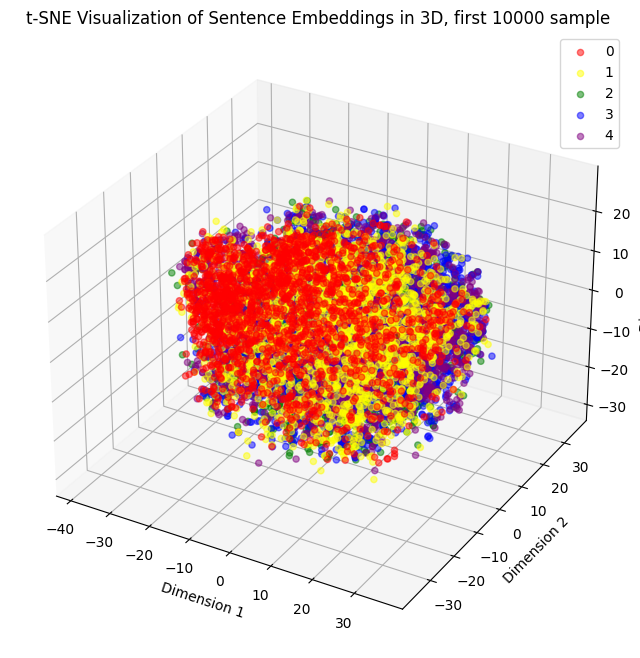

In [239]:
# Plot
label_colors = {"0":"red","1":"yellow","2":"green","3":"blue","4":"purple"}
plt.figure(figsize=(10, 8))
# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
numeric_labels = numeric_labels[:10000]
for label, color in label_colors.items():
    indices = numeric_labels == label_to_numeric[int(label)]
    ax.scatter(vectors_3d[indices, 0], vectors_3d[indices, 1], vectors_3d[indices, 2], c=color, label=label, alpha=0.5)

ax.set_title('t-SNE Visualization of Sentence Embeddings in 3D, first 10000 sample')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()
plt.show()

In [253]:
x[0]

'dr goldberg offers everything i look for in a general practitioner he is nice and easy to talk to without being patronizing he is always on time in seeing his patients he is affiliated with a top notch hospital nyu which my parents have explained to me is very important in case something happens and you need surgery and you can get referrals to see specialists without having to see him first really what more do you need i am sitting here trying to think of any complaints i have about him but i am really drawing a blank'

In [262]:
# Find similar words
similar_words = model.wv.similar_by_word('patronizing', topn=5)
print('Similar words to "sushi":', similar_words)

Similar words to "sushi": [('racist', 0.7622809410095215), ('employed', 0.7176839709281921), ('reporting', 0.7057772874832153), ('recommending', 0.6835465431213379), ('avoiding', 0.6804436445236206)]


In [263]:
text = x[0]
keywords = []
for word in text.split():
    if word in model.wv:
        similar_words = model.wv.similar_by_word(word, topn=1)
        keywords.extend([similar_word[0] for similar_word in similar_words])
print("Keywords:", list(set(keywords)))

Keywords: ['onto', 'ancients', 'doctor', 'acupuncture', 'frustrating', 'racist', 'usually', 'depaul', 'she', 'we', 'associated', 'regards', 'less', 'eric', 'provides', 'informed', 'grandparents', 'into', 'clinic', 'averaging', 'find', 'kirsch', 'balk', 'did', 'particularly', 'want', 'fisher', 'however', 'tier', 'napolitos', 'day', 'edge', 'how', 'difficult', 'extremely', 'clients', 'that', 'w', 'hearing', 'meantime', 'procedure', 'cannot', 'there', 'willing', 'partners', 'another', 'yourself', 'although', 'restrospect', 'threatening', 'guess', 'me', 'argue', 'its', 'hear', '1st', 'qualms', 'after', 'anything', 'everyone', 'him', 'surgical', '61.34', 'my', 'standing', 'experiencing', 'crescendos', 'his', 'pleasant', 'happened']


In [264]:
query = "Italian restaurant with great ambiance"
query_vector = get_average_word2vec(query)
similar_sentences = []
for sentence in x:
    sentence_vector = get_average_word2vec(sentence)
    similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))
    similar_sentences.append((sentence, similarity_score))
similar_sentences = sorted(similar_sentences, key=lambda x: x[1], reverse=True)[:5]
print("Top similar sentences:")
for sentence, score in similar_sentences:
    print(f"- {sentence} (Similarity: {score})")


/tmp/ipykernel_33/3723563275.py:6: RuntimeWarning: invalid value encountered in scalar divide
  similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))


Top similar sentences:
- good food awesome atmosphere with terrific views (Similarity: 0.8613284230232239)
- delicious cozy atmosphere and delightful serving woman very legitimately japanese place great place (Similarity: 0.8243599534034729)
- excellent ambient nice place good food (Similarity: 0.794949471950531)
- great restaurant with great food nice wine the inside ambience is good but there is no nice view of the city (Similarity: 0.7942712306976318)
- love this place great food great atmosphere (Similarity: 0.784882128238678)


In [266]:
query = "The stuff is rude.Their attitude is so bad"
query_vector = get_average_word2vec(query)
similar_sentences = []
for sentence in x:
    sentence_vector = get_average_word2vec(sentence)
    similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))
    similar_sentences.append((sentence, similarity_score))
similar_sentences = sorted(similar_sentences, key=lambda x: x[1], reverse=True)[:5]
print("Top similar sentences:")
for sentence, score in similar_sentences:
    print(f"- {sentence} (Similarity: {score})")

/tmp/ipykernel_33/3890599092.py:6: RuntimeWarning: invalid value encountered in scalar divide
  similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))


Top similar sentences:
- it is crappy (Similarity: 0.7847860455513)
- this place is always busy but for me it is hit and miss sometimes the food is delishious and sometimes it is rotten (Similarity: 0.7657968401908875)
- the problem with subs is 6in is not enough but 12in is too much ha anyway 7.5 is perfect and a 15in sub split just makes sense which is what cousins has the subs are yummy the service is superb the owner is so nice remembers you from last time and is concerned about your food order we love coming here to support this small business owner and his yummy food (Similarity: 0.7472841739654541)
- i think jim w is too interested in getting a funny rating and not so much rating the establishment itself what everyone else is saying is true it is like finding a honus wagner in a vintage cigar box once the box is opened and the treasure is found you will keep coming back no matter how splintery the benches are how hot it is or how informal it is the bean burro enchilada style is 